In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt

# Import all data

In [2]:
X_train = pd.read_parquet("Xtime/X_train.parquet")
X_test = pd.read_parquet("Xtime/X_test.parquet")
Y_train = pd.read_parquet("Ytime/Y_train.parquet")
Y_test = pd.read_parquet("Ytime/Y_test.parquet")
X_train = X_train[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']]
X_test = X_test[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']]
Complete = pd.read_parquet("time_dataset.parquet")

In [3]:
scalerX = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scalerX.transform(X_train))
X_test = pd.DataFrame(scalerX.transform(X_test))
scalerY = MinMaxScaler().fit(Y_train)
Y_train = pd.DataFrame(scalerY.transform(Y_train))
Y_test = pd.DataFrame(scalerY.transform(Y_test))

In [4]:
Y1_train = Y_train[[Y_train.columns[0]]]
Y1_test = Y_test[[Y_test.columns[0]]]
Y2_train = Y_train[[Y_train.columns[1]]]
Y2_test = Y_test[[Y_test.columns[1]]]
Y3_train = Y_train[[Y_train.columns[2]]]
Y3_test = Y_test[[Y_test.columns[2]]]
Y4_train = Y_train[[Y_train.columns[3]]]
Y4_test = Y_test[[Y_test.columns[3]]]
Y5_train = Y_train[[Y_train.columns[4]]]
Y5_test = Y_test[[Y_test.columns[4]]]
Y6_train = Y_train[[Y_train.columns[5]]]
Y6_test = Y_test[[Y_test.columns[5]]]

## Train and score

In [5]:
clf1 = svm.SVR(kernel = "rbf", max_iter=-1, epsilon=0.01, C=5)
startTime = time.time()
clf1.fit(X_train, np.ravel(Y1_train))
elapsedTime = time.time() - startTime
print('{} s'.format(int(elapsedTime)))
print(clf1.score(X_test, Y1_test))

0 s
0.9901944539492537


In [6]:
clf2 = svm.SVR(kernel = "rbf", max_iter=-1, epsilon=0.01, C=0.5)
startTime = time.time()
clf2.fit(X_train, np.ravel(Y2_train))
elapsedTime = time.time() - startTime
print('{} s'.format(int(elapsedTime)))
print(clf2.score(X_test, Y2_test))

0 s
0.9908111941399679


In [7]:
clf3 = svm.SVR(kernel = "rbf", max_iter=-1, epsilon=0.01, C=1)
startTime = time.time()
clf3.fit(X_train, np.ravel(Y3_train))
elapsedTime = time.time() - startTime
print('{} s'.format(int(elapsedTime)))
print(clf3.score(X_test, Y3_test))

0 s
0.9880712041806488


In [8]:
clf4 = svm.SVR(kernel = "rbf", max_iter=-1, epsilon=0.01, C=10)
startTime = time.time()
clf4.fit(X_train, np.ravel(Y4_train))
elapsedTime = time.time() - startTime
print('{} s'.format(int(elapsedTime)))
print(clf4.score(X_test, Y4_test))

0 s
0.9867440133986695


In [9]:
clf5 = svm.SVR(kernel = "rbf", max_iter=-1, epsilon=0.01, C=10)
startTime = time.time()
clf5.fit(X_train, np.ravel(Y5_train))
elapsedTime = time.time() - startTime
print('{} s'.format(int(elapsedTime)))
print(clf5.score(X_test, Y5_test))

0 s
0.9925423812541968


In [10]:
clf6 = svm.SVR(kernel = "rbf", max_iter=-1, epsilon=0.01, C=10)
startTime = time.time()
clf6.fit(X_train, np.ravel(Y6_train))
elapsedTime = time.time() - startTime
print('{} s'.format(int(elapsedTime)))
print(clf6.score(X_test, Y6_test))

0 s
0.991542683368031


## Test for each year

In [11]:
np.abs(clf1.predict(X_test.iloc[0::4]) - np.array(Y1_test.iloc[0::4][0])).mean()

0.012706473956338197

In [12]:
np.abs(clf1.predict(X_test.iloc[1::4]) - np.array(Y1_test.iloc[1::4][0])).mean()

0.010525492265945036

In [13]:
np.abs(clf1.predict(X_test.iloc[2::4]) - np.array(Y1_test.iloc[2::4][0])).mean()

0.0110418129814732

In [14]:
np.abs(clf1.predict(X_test.iloc[3::4]) - np.array(Y1_test.iloc[3::4][0])).mean()

0.011954658716678444

## One concrete example

In [15]:
i = 120
scalerY.inverse_transform([[clf1.predict([X_test.iloc[i]])[0], clf2.predict([X_test.iloc[i]])[0], clf3.predict([X_test.iloc[i]])[0], 
                          clf4.predict([X_test.iloc[i]])[0], clf5.predict([X_test.iloc[i]])[0], clf6.predict([X_test.iloc[i]])[0], 0]])

array([[6.08993277e+04, 1.42112786e+05, 1.83873535e+03, 8.92985027e+01,
        2.37065255e+03, 4.87639148e+04, 1.99200000e+03]])

In [16]:
scalerY.inverse_transform([Y_test.iloc[i]])

array([[ 57900., 136649.,   3206.,    821.,   2385.,  49816.,   2014.]])

## Probamos con España

In [17]:
country = 'ESP'
esp = Complete[Complete.COU == country]

### Municipal

In [18]:
years = list(esp.Year)
mun = list(esp.Municipal)
predictions = clf1.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[0] for a in scalerY.inverse_transform([[a,0,0,0,0,0,0] for a in predictions])]

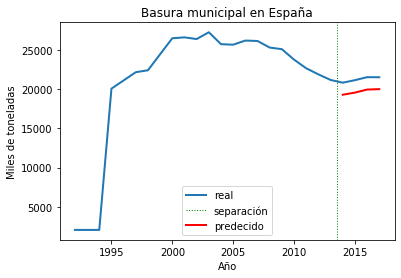

In [19]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura municipal en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Household

In [20]:
years = list(esp.Year)
mun = list(esp.Household)
predictions = clf2.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[1] for a in scalerY.inverse_transform([[0,a,0,0,0,0,0] for a in predictions])]

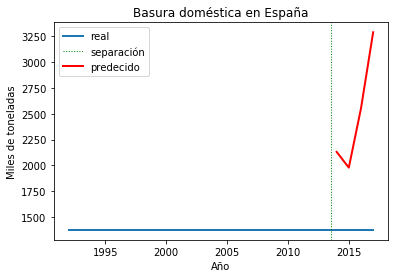

In [21]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura doméstica en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recovered

In [22]:
years = list(esp.Year)
mun = list(esp.Recovered)
predictions = clf3.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[2] for a in scalerY.inverse_transform([[0,0,a,0,0,0,0] for a in predictions])]

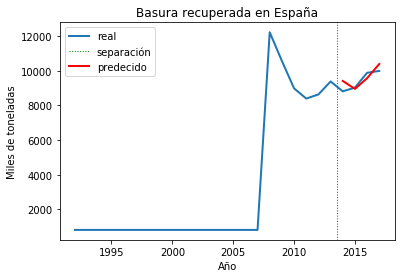

In [23]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura recuperada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recicled

In [24]:
years = list(esp.Year)
mun = list(esp.Recicled)
predictions = clf4.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[3] for a in scalerY.inverse_transform([[0,0,0,a,0,0,0] for a in predictions])]

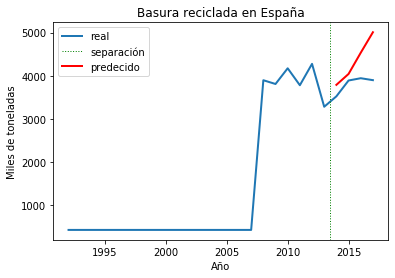

In [25]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura reciclada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Compost

In [26]:
years = list(esp.Year)
mun = list(esp.Compost)
predictions = clf5.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[4] for a in scalerY.inverse_transform([[0,0,0,0,a,0,0] for a in predictions])]

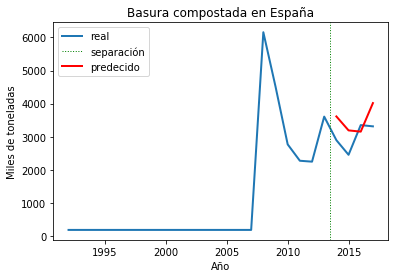

In [27]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura compostada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Disposal

In [28]:
years = list(esp.Year)
mun = list(esp.Disposal)
predictions = clf1.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[5] for a in scalerY.inverse_transform([[0,0,0,0,0,a,0] for a in predictions])]

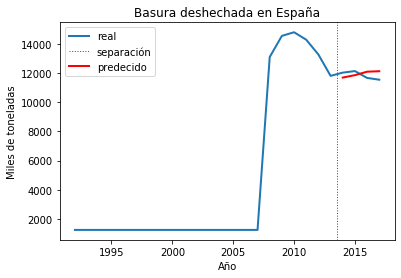

In [29]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura deshechada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()